<h1 style="border: 2px solid cyan; border-radius: 8px; padding: 8px; text-align: center;"> Exploratory Data Analysis and Visualization Showcase </h1>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

## 1| Data Selection


- Dataset Name: Algerian Forest Fires Dataset
- Data Source: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
- Brief Description: The Algerian forest fires dataset consists of 244 instances, with 122 instances for each of the two regions: Bejaia and Sidi Bel-abbes. The dataset covers a period from June 2012 to September 2012.


### Variable Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire


## 2| Data Loading and Transformation


- Note: I manually restructured the `Algerian_forest_fires_dataset_UPDATE.csv` file for better usability.

### White space removal

In [2]:
def remove_white_space(input_file, output_file="output.csv"):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file)

    # Remove whitespaces from all columns
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Save the cleaned DataFrame as a CSV file
    df.to_csv(output_file, index=False)

In [3]:
remove_white_space(
    input_file="./algerian+forest+fires+dataset/Algerian_forest_fires.csv",
    output_file="./algerian+forest+fires+dataset/Algerian_forest_fires_no_white_space.csv",
)
remove_white_space(
    input_file="./algerian+forest+fires+dataset/Bejaia Region Dataset.csv",
    output_file="./algerian+forest+fires+dataset/Bejaia Region Dataset_no_white_space.csv",
)
remove_white_space(
    input_file="./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset.csv",
    output_file="./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset_no_white_space.csv",
)

### Loading data

In [4]:
df = pd.read_csv(
    "./algerian+forest+fires+dataset/Algerian_forest_fires_no_white_space.csv",
)
bejaia_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Bejaia Region Dataset_no_white_space.csv",
)
sidi_bel_abbes_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset_no_white_space.csv",
)

### Handling missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [6]:
bejaia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [7]:
sidi_bel_abbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


- Since there is only one row with a missing value, we can safely replace that value with the last valid observation without significantly impacting the results.


In [8]:
df.fillna(method="ffill", inplace=True)

In [9]:
sidi_bel_abbes_df.fillna(method="ffill", inplace=True)

### Tarnsforming categorical values into numerical values

In [10]:
ndf_dmy = df.copy().astype("category").apply(lambda x: x.cat.codes)
nb_df_dmy = bejaia_df.copy().astype("category").apply(lambda x: x.cat.codes)
ns_df_dmy = sidi_bel_abbes_df.copy().astype("category").apply(lambda x: x.cat.codes)

- Note: In the classes column, `0` represents `fire`, while `1` represents `not fire`.

## 3| Exploratory Data Analysis (EDA)

- Since we don't need the first three columns (day, month, year), I will create a data frame without them.


In [11]:
ndf = ndf_dmy.iloc[:, 3:]
nb_df = nb_df_dmy.iloc[:, 3:]
ns_df = ns_df_dmy.iloc[:, 3:]

###  Statistical Summaries

#### All the data

In [12]:
ndf_description = ndf.describe()
ndf_description

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,9.176230,33.959016,8.475410,4.692623,95.709016,72.897541,103.639344,39.475410,77.524590,48.057377,0.434426
std,3.601224,14.598832,2.673489,8.630014,49.009713,46.765523,57.469200,29.362699,50.341421,41.246085,0.496700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,7.000000,0.000000,55.750000,34.000000,52.750000,14.000000,32.000000,7.000000,0.000000
50%,9.000000,35.000000,8.000000,0.000000,103.500000,69.000000,107.500000,32.000000,74.500000,41.000000,0.000000
75%,12.000000,45.250000,10.000000,5.000000,141.000000,110.250000,153.250000,62.000000,120.250000,86.000000,1.000000
max,18.000000,61.000000,17.000000,38.000000,172.000000,165.000000,197.000000,105.000000,173.000000,125.000000,1.000000


#### Bejaia

In [13]:
nb_df_description = nb_df.describe()
nb_df_description

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,8.196721,20.606557,4.975410,3.713115,54.114754,41.786885,48.565574,27.631148,44.139344,24.622951,0.516393
std,3.276864,10.131007,2.773735,6.043205,30.008593,27.254306,32.598481,19.093160,29.280438,21.663210,0.501792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,13.000000,3.000000,0.000000,28.250000,16.250000,18.250000,11.250000,18.000000,5.000000,0.000000
50%,8.000000,21.000000,5.000000,0.000000,56.500000,39.500000,46.500000,24.500000,42.500000,18.500000,1.000000
75%,11.000000,29.750000,7.000000,5.000000,80.750000,63.750000,76.750000,41.000000,68.750000,41.750000,1.000000
max,14.000000,38.000000,12.000000,24.000000,100.000000,93.000000,107.000000,66.000000,98.000000,70.000000,1.000000


#### Sidi bel abbes

In [14]:
ns_df_description = ns_df.describe()
ns_df_description

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,8.172131,27.172131,7.942623,3.877049,51.795082,51.262295,55.393443,36.049180,54.639344,38.590164,0.352459
std,3.617434,14.062254,2.385560,6.678667,27.784870,29.919949,30.656335,23.121974,31.492113,28.246189,0.479706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.250000,7.000000,0.000000,30.250000,25.250000,29.250000,16.250000,28.250000,9.250000,0.000000
50%,9.000000,28.000000,8.000000,0.000000,52.500000,51.500000,57.000000,33.500000,55.500000,37.500000,0.000000
75%,11.000000,37.750000,9.750000,4.750000,74.750000,76.750000,84.750000,53.750000,80.750000,62.750000,1.000000
max,16.000000,54.000000,14.000000,26.000000,98.000000,104.000000,104.000000,81.000000,110.000000,89.000000,1.000000


### Distributions

#### All the data

- The dataset contains 244 instances.
- Temperature:
  - The temperature ranges from 0 to 18 degrees Celsius.
  - The average temperature is approximately 9.18 degrees Celsius with a standard deviation of around 3.60 degrees Celsius.

- RH (Relative Humidity):
  - The relative humidity ranges from 0% to 61%.
  - The average relative humidity is approximately 33.96% with a standard deviation of around 14.60%.

- Ws (Wind Speed):
  - The wind speed ranges from 0 km/h to 17 km/h.
  - The average wind speed is approximately 8.48 km/h with a standard deviation of around 2.67 km/h.

- Rain:
  - The amount of rainfall ranges from 0 mm to 38 mm.
  - The average rainfall is approximately 4.69 mm with a standard deviation of around 8.63 mm.

- FFMC (Fine Fuel Moisture Code):
  - The FFMC index ranges from 0 to 172.0.
  - The average FFMC index is approximately 95.71 with a standard deviation of around 49.01.

- DMC (Duff Moisture Code):
  - The DMC index ranges from 0 to 165.0.
  - The average DMC index is approximately 72.90 with a standard deviation of around 46.77.

- DC (Drought Code):
  - The DC index ranges from 0 to 197.0.
  - The average DC index is approximately 103.64 with a standard deviation of around 57.47.

- ISI (Initial Spread Index):
  - The ISI index ranges from 0 to 105.0.
  - The average ISI index is approximately 39.48 with a standard deviation of around 29.36.

- BUI (Buildup Index):
  - The BUI index ranges from 0 to 173.0.
  - The average BUI index is approximately 77.52 with a standard deviation of around 50.34.

- FWI (Fire Weather Index):
  - The FWI index ranges from 0 to 125.0.
  - The average FWI index is approximately 48.06 with a standard deviation of around 41.25.

- Classes:
  - The "Classes" variable represents two classes: Fire and not Fire.
  - The distribution does not provide statistical measures, as it represents categorical data.

#### Bejaia

- The dataset contains 122 instances.
- Temperature:
  - The temperature ranges from 0 to 14 degrees Celsius.
  - The average temperature is approximately 8.20 degrees Celsius with a standard deviation of around 3.28 degrees Celsius.

- RH (Relative Humidity):
  - The relative humidity ranges from 0% to 38%.
  - The average relative humidity is approximately 20.61% with a standard deviation of around 10.13%.

- Ws (Wind Speed):
  - The wind speed ranges from 0 km/h to 12 km/h.
  - The average wind speed is approximately 4.98 km/h with a standard deviation of around 2.77 km/h.

- Rain:
  - The amount of rainfall ranges from 0 mm to 24 mm.
  - The average rainfall is approximately 3.71 mm with a standard deviation of around 6.04 mm.

- FFMC (Fine Fuel Moisture Code):
  - The FFMC index ranges from 0 to 100.
  - The average FFMC index is approximately 54.11 with a standard deviation of around 30.01.

- DMC (Duff Moisture Code):
  - The DMC index ranges from 0 to 93.
  - The average DMC index is approximately 41.79 with a standard deviation of around 27.25.

- DC (Drought Code):
  - The DC index ranges from 0 to 107.
  - The average DC index is approximately 48.57 with a standard deviation of around 32.60.

- ISI (Initial Spread Index):
  - The ISI index ranges from 0 to 66.
  - The average ISI index is approximately 27.63 with a standard deviation of around 19.09.

- BUI (Buildup Index):
  - The BUI index ranges from 0 to 98.
  - The average BUI index is approximately 44.14 with a standard deviation of around 29.28.

- FWI (Fire Weather Index):
  - The FWI index ranges from 0 to 70.
  - The average FWI index is approximately 24.62 with a standard deviation of around 21.66.

- Classes:
  - The "Classes" variable represents two classes: Fire and not Fire.
  - The distribution does not provide statistical measures, as it represents categorical data.


#### Sidi bel abbes

- The dataset contains 122 instances.
- Temperature:
  - The temperature ranges from 0 to 16 degrees Celsius.
  - The average temperature is approximately 8.17 degrees Celsius with a standard deviation of around 3.62 degrees Celsius.

- RH (Relative Humidity):
  - The relative humidity ranges from 0% to 54%.
  - The average relative humidity is approximately 27.17% with a standard deviation of around 14.06%.

- Ws (Wind Speed):
  - The wind speed ranges from 0 km/h to 14 km/h.
  - The average wind speed is approximately 7.94 km/h with a standard deviation of around 2.39 km/h.

- Rain:
  - The amount of rainfall ranges from 0 mm to 26 mm.
  - The average rainfall is approximately 3.88 mm with a standard deviation of around 6.68 mm.

- FFMC (Fine Fuel Moisture Code):
  - The FFMC index ranges from 0 to 98.
  - The average FFMC index is approximately 51.80 with a standard deviation of around 27.78.

- DMC (Duff Moisture Code):
  - The DMC index ranges from 0 to 104.
  - The average DMC index is approximately 51.26 with a standard deviation of around 29.92.

- DC (Drought Code):
  - The DC index ranges from 0 to 104.
  - The average DC index is approximately 55.39 with a standard deviation of around 30.66.

- ISI (Initial Spread Index):
  - The ISI index ranges from 0 to 81.
  - The average ISI index is approximately 36.05 with a standard deviation of around 23.12.

- BUI (Buildup Index):
  - The BUI index ranges from 0 to 110.
  - The average BUI index is approximately 54.64 with a standard deviation of around 31.49.

- FWI (Fire Weather Index):
  - The FWI index ranges from 0 to 89.
  - The average FWI index is approximately 38.59 with a standard deviation of around 28.25.

- Classes:
  - The "Classes" variable represents two classes: Fire and not Fire.
  - The distribution does not provide statistical measures, as it represents categorical data.

### Correlations

#### All the data

In [15]:
ndf_correlation_matrix = ndf.corr()
ndf_correlation_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.653618,-0.267761,-0.354045,0.676071,0.581081,-0.166799,0.631112,0.553108,0.381737,-0.519210
RH,-0.653618,1.000000,0.230672,0.231485,-0.666042,-0.490243,0.044162,-0.676700,-0.450451,-0.296378,0.434916
Ws,-0.267761,0.230672,1.000000,0.097681,-0.118697,-0.040555,0.032405,0.016872,-0.016354,-0.073767,0.057662
Rain,-0.354045,0.231485,0.097681,1.000000,-0.636983,-0.470928,0.420583,-0.527156,-0.500761,-0.443157,0.522819
FFMC,0.676071,-0.666042,-0.118697,-0.636983,1.000000,0.803727,-0.280213,0.936629,0.793341,0.603040,-0.866411
DMC,0.581081,-0.490243,-0.040555,-0.470928,0.803727,1.000000,-0.170694,0.783458,0.986670,0.497098,-0.698756
DC,-0.166799,0.044162,0.032405,0.420583,-0.280213,-0.170694,1.000000,-0.198925,-0.165778,-0.119381,0.176349
ISI,0.631112,-0.676700,0.016872,-0.527156,0.936629,0.783458,-0.198925,1.000000,0.762168,0.467944,-0.802306
BUI,0.553108,-0.450451,-0.016354,-0.500761,0.793341,0.986670,-0.165778,0.762168,1.000000,0.512561,-0.701535
FWI,0.381737,-0.296378,-0.073767,-0.443157,0.603040,0.497098,-0.119381,0.467944,0.512561,1.000000,-0.670523


#### Bejaia

In [16]:
nb_df_correlation_matrix = nb_df.corr()
nb_df_correlation_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.659345,-0.206776,-0.582653,0.726083,0.639542,0.617503,0.699014,0.635731,0.665471,-0.499563
RH,-0.659345,1.000000,0.254933,0.412284,-0.637564,-0.457807,-0.417579,-0.608010,-0.451010,-0.512960,0.373563
Ws,-0.206776,0.254933,1.000000,0.288004,-0.199141,-0.018874,0.032237,-0.063842,0.001365,-0.014597,0.116079
Rain,-0.582653,0.412284,0.288004,1.000000,-0.747022,-0.571800,-0.622530,-0.660956,-0.585602,-0.586727,0.575252
FFMC,0.726083,-0.637564,-0.199141,-0.747022,1.000000,0.833557,0.792396,0.967576,0.822887,0.915069,-0.862353
DMC,0.639542,-0.457807,-0.018874,-0.571800,0.833557,1.000000,0.953512,0.838125,0.993066,0.926413,-0.733368
DC,0.617503,-0.417579,0.032237,-0.622530,0.792396,0.953512,1.000000,0.804108,0.978182,0.889856,-0.700070
ISI,0.699014,-0.608010,-0.063842,-0.660956,0.967576,0.838125,0.804108,1.000000,0.831556,0.959121,-0.857227
BUI,0.635731,-0.451010,0.001365,-0.585602,0.822887,0.993066,0.978182,0.831556,1.000000,0.920967,-0.723235
FWI,0.665471,-0.512960,-0.014597,-0.586727,0.915069,0.926413,0.889856,0.959121,0.920967,1.000000,-0.841806


#### Sidi bel abbes

In [17]:
ns_df_correlation_matrix = ns_df.corr()
ns_df_correlation_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.601544,-0.244972,-0.171866,0.609890,0.491858,-0.061129,0.564878,0.472387,0.344689,-0.501980
RH,-0.601544,1.000000,0.096377,0.160382,-0.698475,-0.476716,-0.025080,-0.699722,-0.461482,-0.216896,0.451583
Ws,-0.244972,0.096377,1.000000,-0.148801,0.074508,0.017465,-0.040823,0.180447,0.015123,0.067841,-0.090510
Rain,-0.171866,0.160382,-0.148801,1.000000,-0.618972,-0.487081,0.476747,-0.570677,-0.505765,-0.436258,0.573408
FFMC,0.609890,-0.698475,0.074508,-0.618972,1.000000,0.776027,-0.205686,0.970617,0.768818,0.493580,-0.839053
DMC,0.491858,-0.476716,0.017465,-0.487081,0.776027,1.000000,-0.104154,0.745387,0.992204,0.482858,-0.662341
DC,-0.061129,-0.025080,-0.040823,0.476747,-0.205686,-0.104154,1.000000,-0.151691,-0.136296,-0.209925,0.201796
ISI,0.564878,-0.699722,0.180447,-0.570677,0.970617,0.745387,-0.151691,1.000000,0.729317,0.417640,-0.786166
BUI,0.472387,-0.461482,0.015123,-0.505765,0.768818,0.992204,-0.136296,0.729317,1.000000,0.501136,-0.672610
FWI,0.344689,-0.216896,0.067841,-0.436258,0.493580,0.482858,-0.209925,0.417640,0.501136,1.000000,-0.669323


### Outliers

- We will use the interquartile range (IQR) method to detect outliers and replace them with the mean.

#### All the data

In [18]:
Q1 = ndf.quantile(0.25)
Q3 = ndf.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mean = ndf.mean()
outliers = (ndf < lower_bound) | (ndf > upper_bound)
ndf = ndf.mask(outliers, mean, axis=1)

#### Bejaia

In [19]:
Q1 = nb_df.quantile(0.25)
Q3 = nb_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mean = nb_df.mean()
outliers = (nb_df < lower_bound) | (nb_df > upper_bound)
nb_df = nb_df.mask(outliers, mean, axis=1)

#### Sidi bel abbes

In [20]:
Q1 = ns_df.quantile(0.25)
Q3 = ns_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mean = ns_df.mean()
outliers = (ns_df < lower_bound) | (ns_df > upper_bound)
ns_df = ns_df.mask(outliers, mean, axis=1)

## 4| Data Visualization

- Reminder: In the classes column, `0` represents `fire`, while `1` represents `not fire`.

### Pie and Bar charts

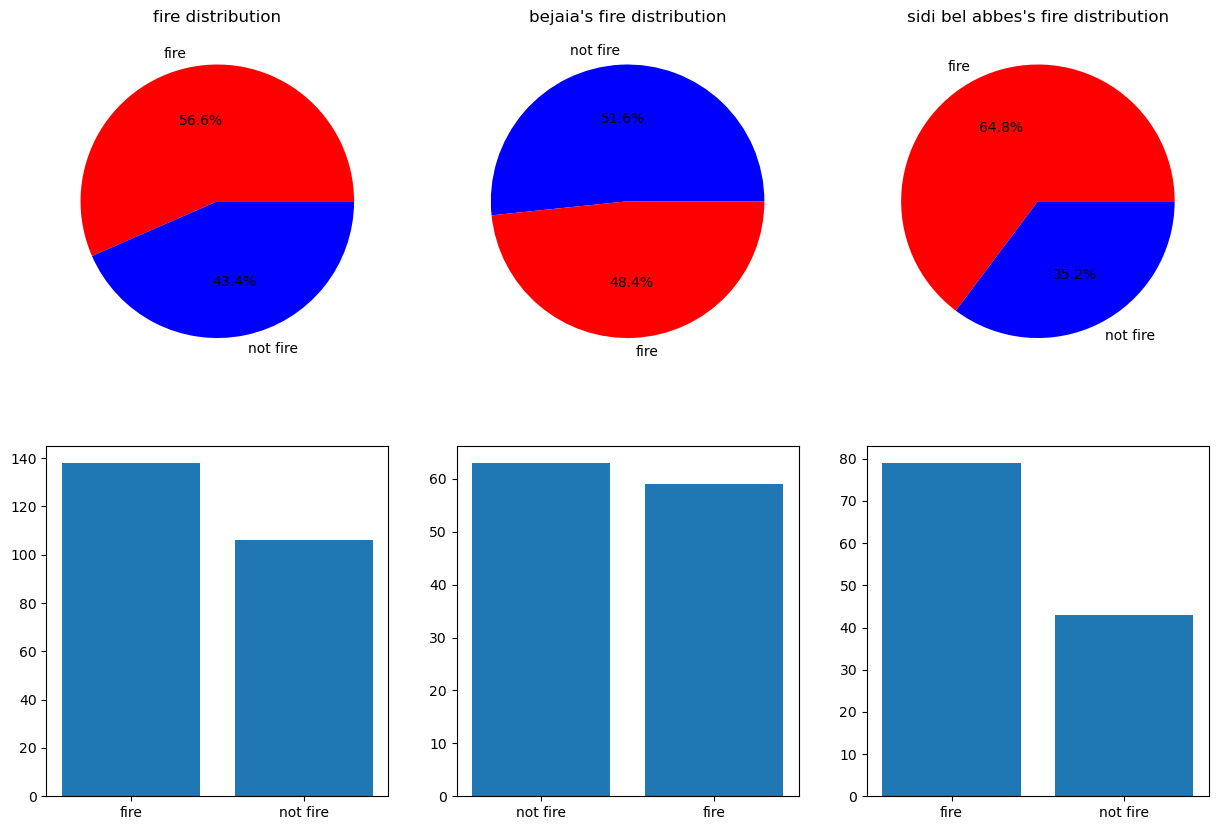

In [21]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

ax[0, 0].set_title("fire distribution")
fire_counts = df["Classes"].value_counts()
ax[0, 0].pie(
    fire_counts, labels=fire_counts.index, autopct="%.1f%%", colors=["red", "blue"]
)
ax[1, 0].bar(fire_counts.index.values, fire_counts.values)

ax[0, 1].set_title("bejaia's fire distribution")
b_fire_counts = bejaia_df["Classes"].value_counts()
ax[0, 1].pie(
    b_fire_counts, labels=b_fire_counts.index, autopct="%.1f%%", colors=["blue", "red"]
)
ax[1, 1].bar(b_fire_counts.index.values, b_fire_counts.values)

ax[0, 2].set_title("sidi bel abbes's fire distribution")
s_fire_counts = sidi_bel_abbes_df["Classes"].value_counts()
ax[0, 2].pie(
    s_fire_counts, labels=s_fire_counts.index, autopct="%.1f%%", colors=["red", "blue"]
)
ax[1, 2].bar(s_fire_counts.index.values, s_fire_counts.values)

plt.show()

### Histograms

#### All the data

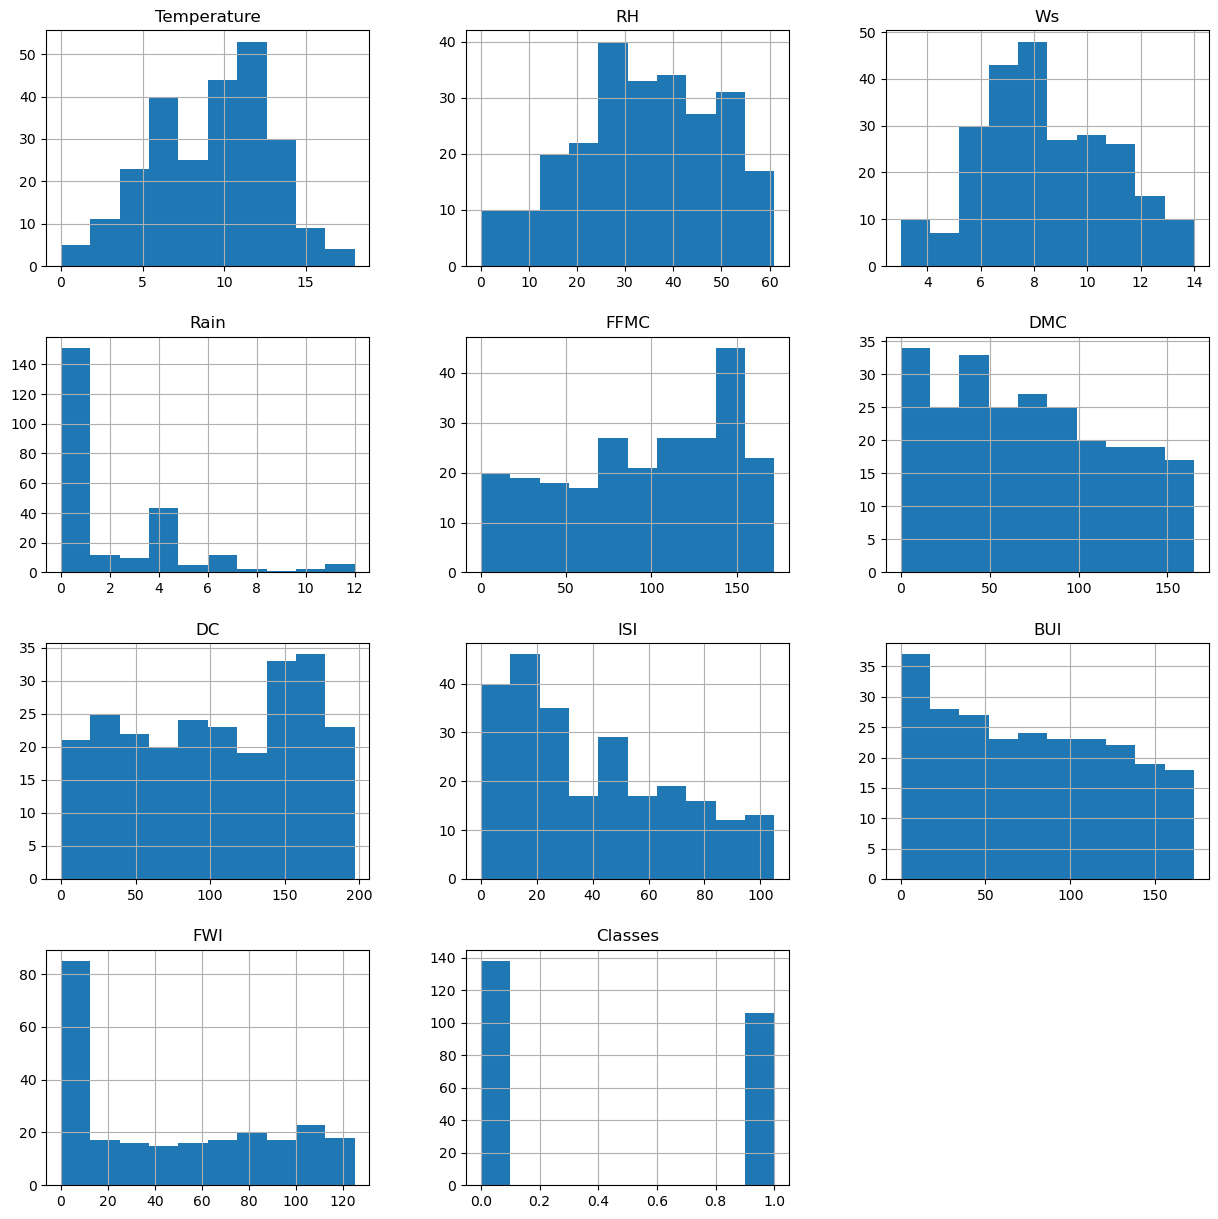

In [22]:
ndf_hist = ndf.hist(figsize=(15,15))

#### Bejaia

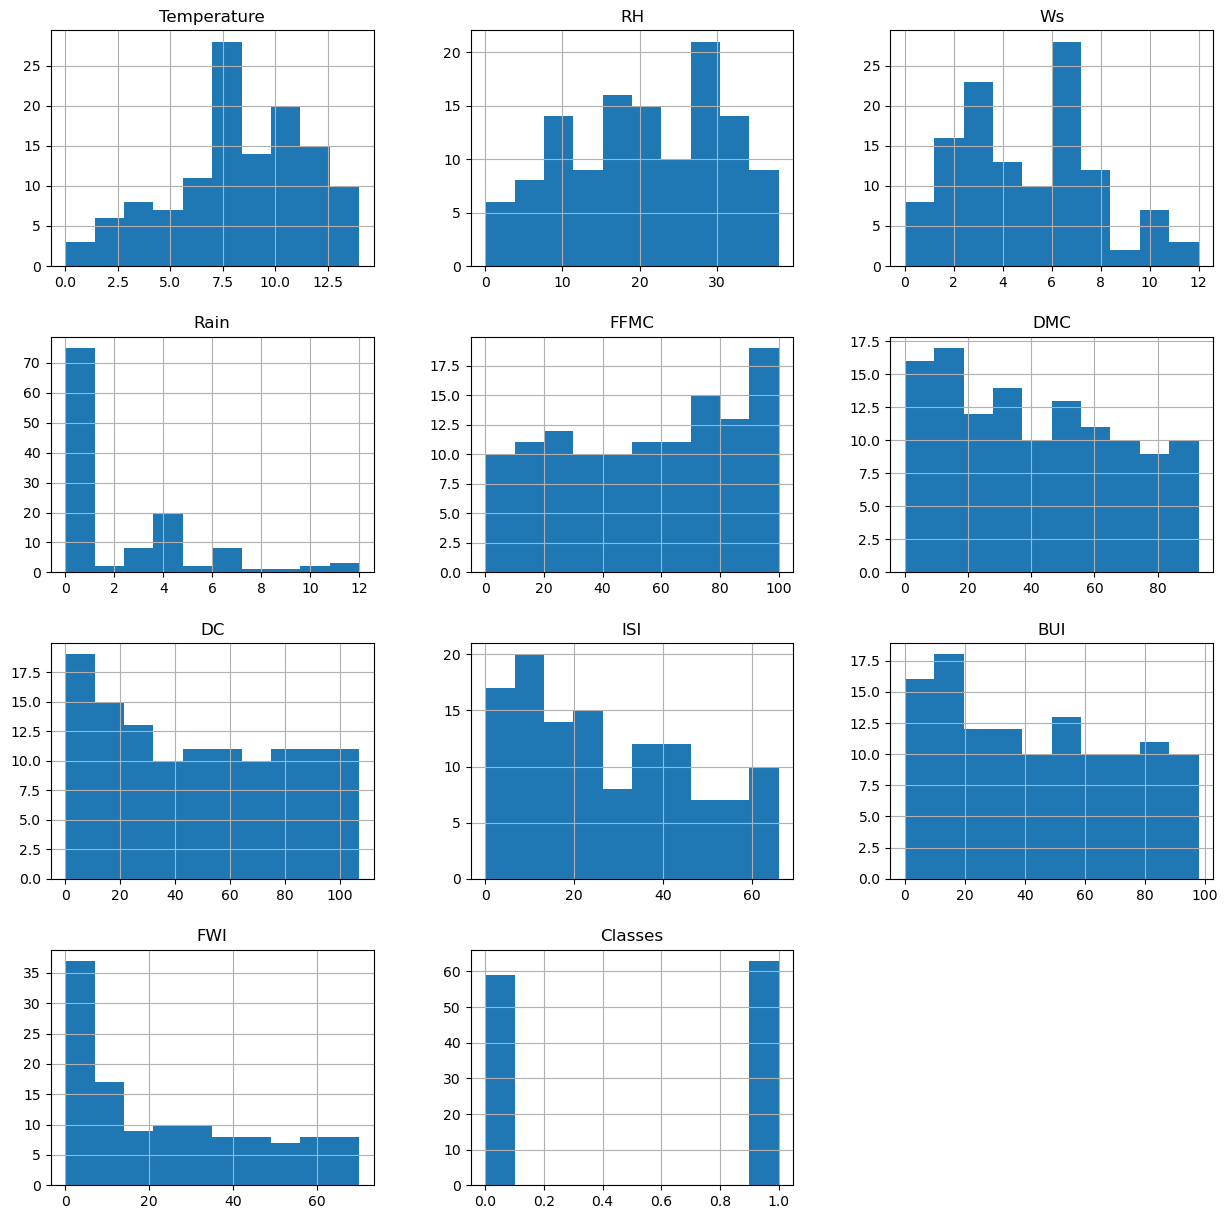

In [23]:
nb_df_hist = nb_df.hist(figsize=(15,15))

#### Sidi bel abbes

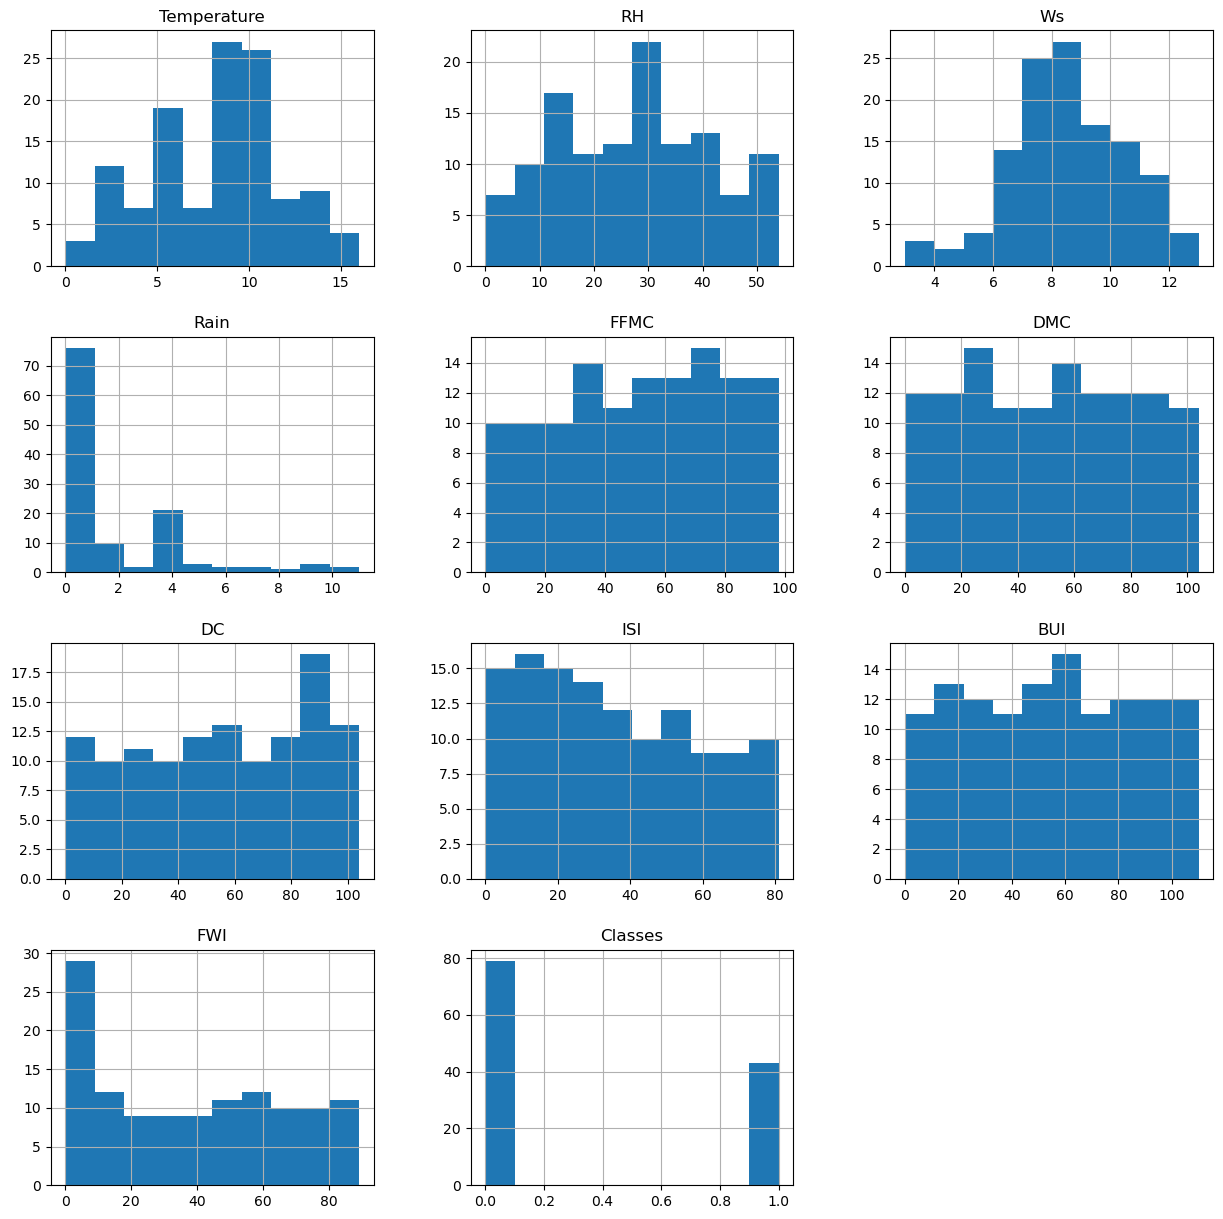

In [24]:
ns_df_hist = ns_df.hist(figsize=(15,15))

### Box plots

#### All the data

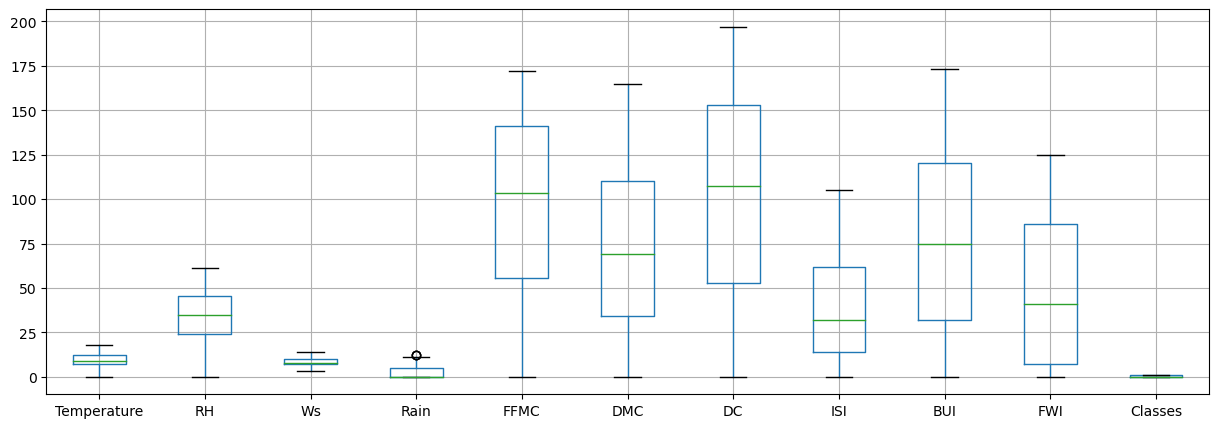

In [25]:
plt.figure(figsize=(15,5))
ndf_bp = ndf.boxplot()
plt.show()

#### Bejaia

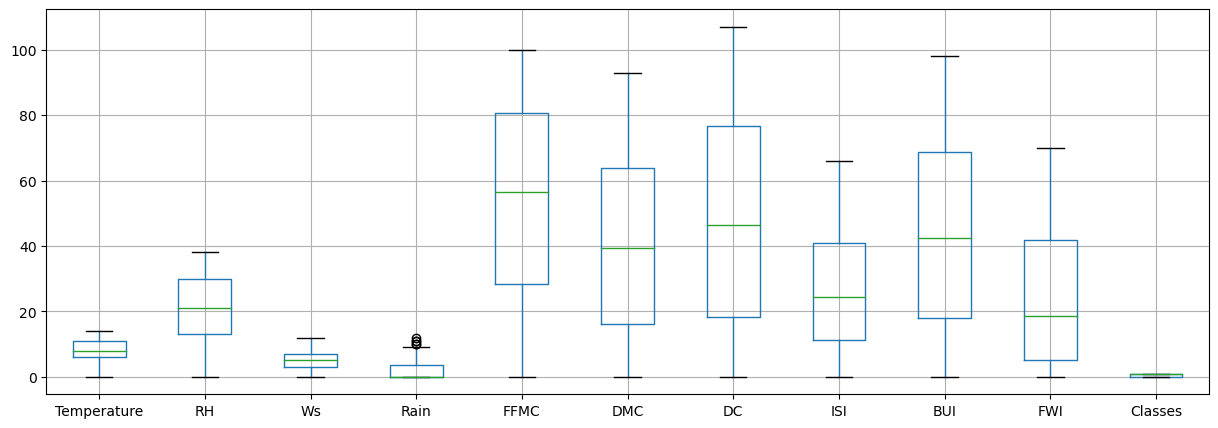

In [26]:
plt.figure(figsize=(15,5))
nb_df_bp = nb_df.boxplot()
plt.show()

#### Sidi bel abbes

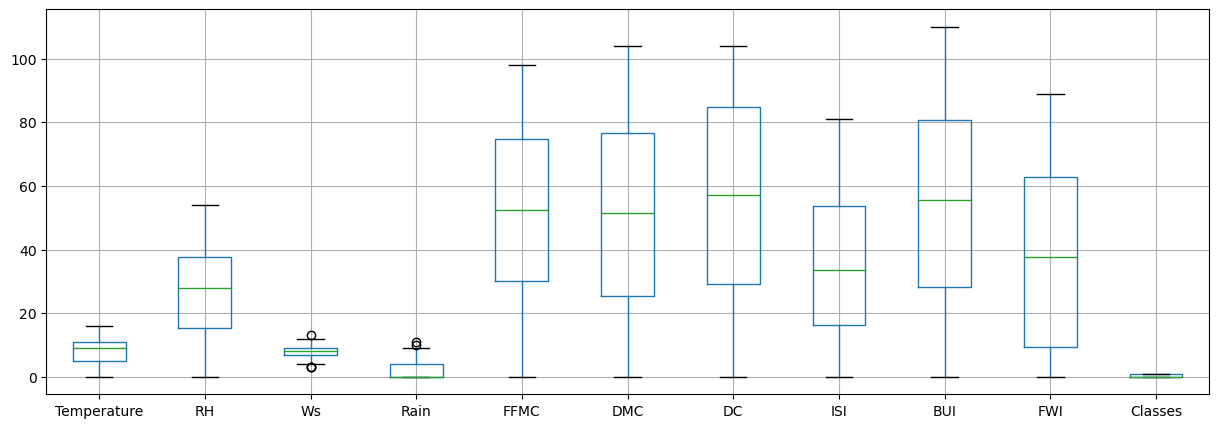

In [27]:
plt.figure(figsize=(15,5))
ns_df_bp = ns_df.boxplot()
plt.show()

### Scatter plots

- Note: There is no need for the scatter plot and time series of `ndf` (all data) since it would be redundant information.

#### Bejaia

In [28]:
fig = px.scatter()
for column in nb_df.columns:
    fig.add_scatter(
        x=nb_df.index, y=nb_df[column], mode="markers", name=column, opacity=0.5
    )

fig.update_layout(xaxis_title="Time", yaxis_title="Value", title="Scatter Plots")

fig.show()

#### Sidi bel abbes

In [29]:
fig = px.scatter()
for column in ns_df.columns:
    fig.add_scatter(
        x=ns_df.index, y=ns_df[column], mode="markers", name=column, opacity=0.5
    )

fig.update_layout(xaxis_title="Time", yaxis_title="Value", title="Scatter Plots")

fig.show()

### Time series

- Reminder: There is no need for the scatter plot and time series of `ndf` (all data) since it would be redundant information.

#### Bejaia

In [30]:
fig = go.Figure()

for column in nb_df.columns:
    fig.add_trace(go.Scatter(x=nb_df.index, y=nb_df[column], mode="lines", name=column))

fig.update_layout(xaxis_title="Time", yaxis_title="Value", title="Time Series")

fig.show()


#### Sidi bel abbes

In [31]:
fig = go.Figure()

for column in ns_df.columns:
    fig.add_trace(go.Scatter(x=ns_df.index, y=ns_df[column], mode="lines", name=column))

fig.update_layout(xaxis_title="Time", yaxis_title="Value", title="Time Series")

fig.show()

### Heat maps

#### All the data

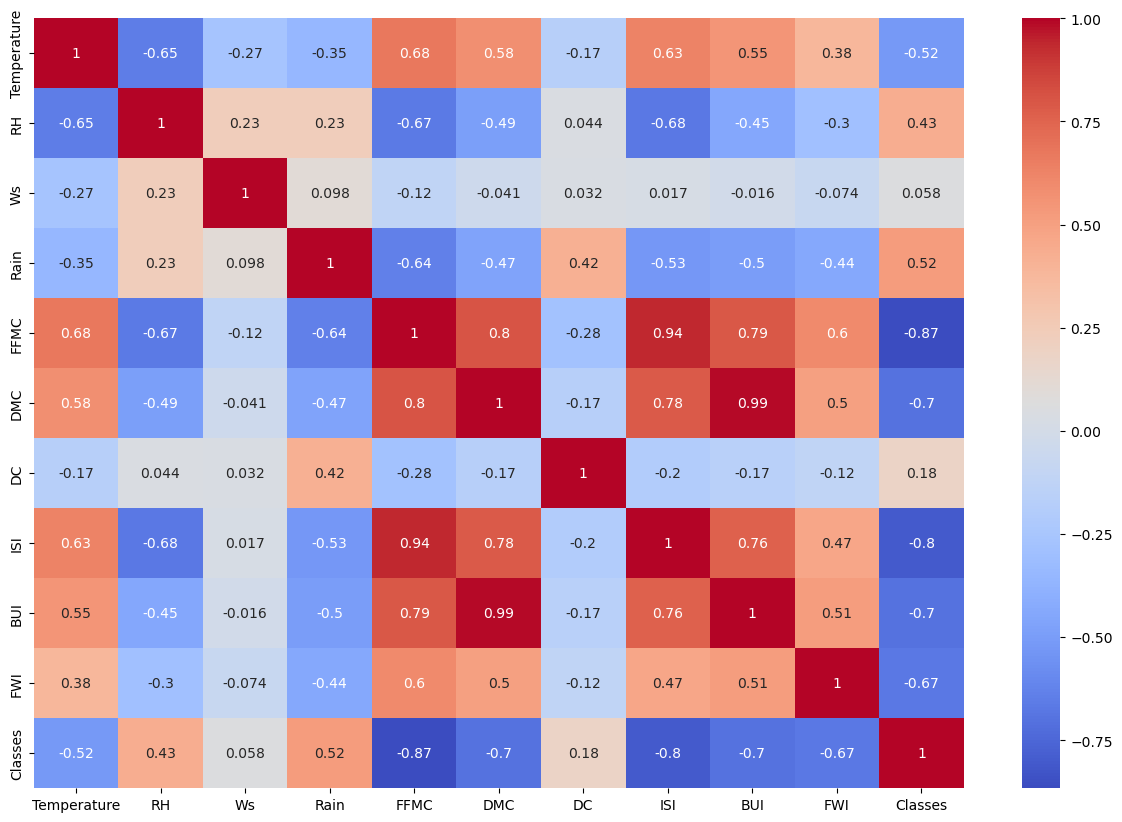

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(ndf_correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Bejaia

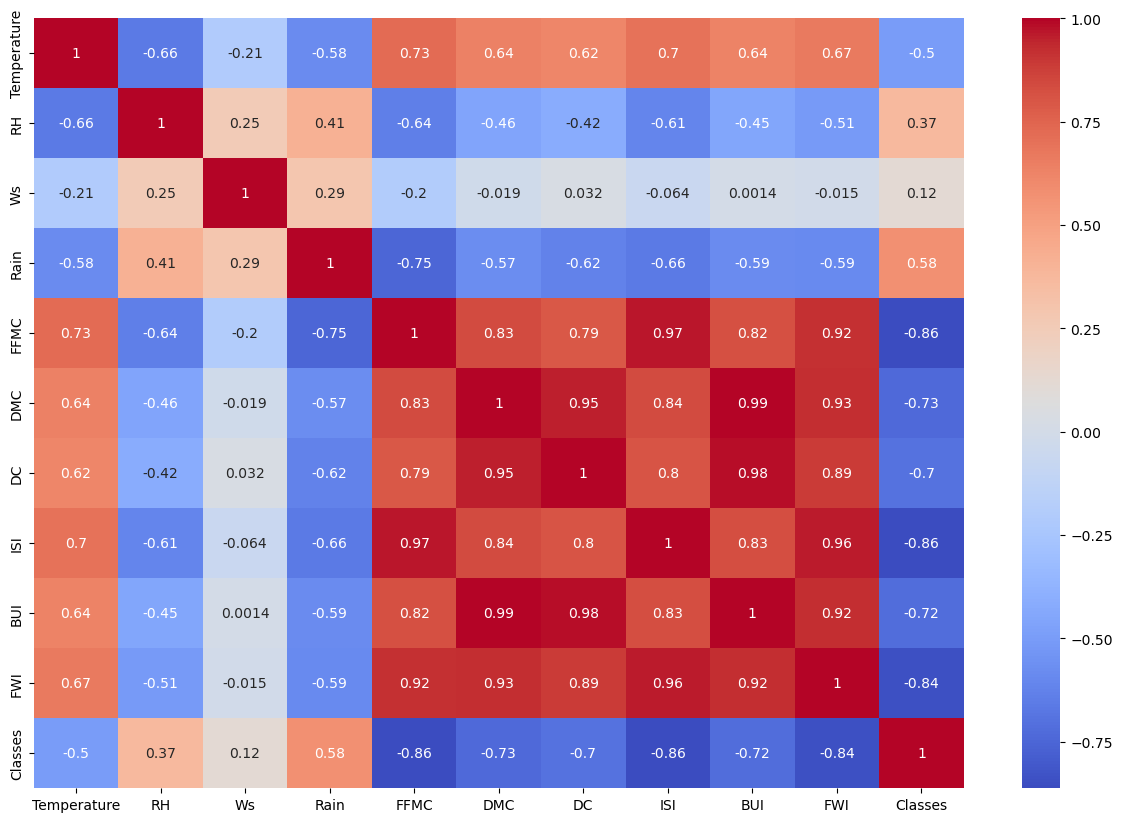

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(nb_df_correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Sidi bel abbes

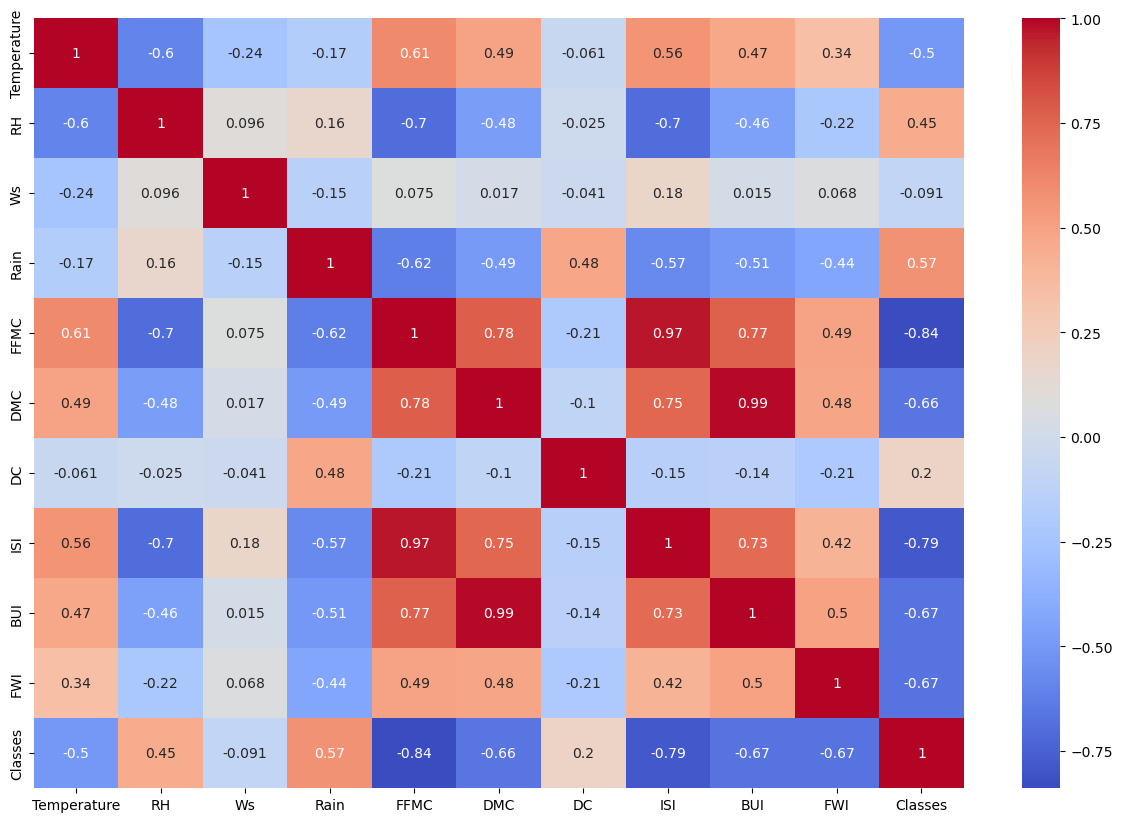

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(ns_df_correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## 5|  Critical Review

### Misleading visualizations.

- Analyzing the time series and heat map of the Bejaia's data suggests that the DC (Drought Code) tends to exhibit a similar behavior to the FFMC (Fine Fuel Moisture Code) and DMC (Duff Moisture Code). However, after analyzing the time series and heat map of the Sidi bel abbas data, we discovered that the behavior of the data was different.

#### Bejaia's dc and dmc time series

![bejaia dc and dmc](notes/b_dc_dmc.jpg)

#### Sidi bel abbas's dc and dmc time series

![sidi bel abbas dc and dmc](notes/s_dc_dmc.jpg)


### Consequences of mislead insights

1. **Inaccurate decision-making:** Flawed or incorrect insights can lead to poor strategic choices, misguided policies, and ineffective actions.
1. **False sense of security or risk:** Misleading insights can create a false perception of security or risk, leading to underestimation or overestimation of risks and disregarding important factors.
1. **Missed opportunities:** Misleading insights can prevent the identification of valuable opportunities, causing organizations or individuals to miss out on improvements, innovations, or competitive advantages.
1. **Damaged reputation and trust:** Misleading insights erode trust in the data analysis process and damage the credibility of individuals or organizations involved.
1. **Wasted resources:** Acting on misleading insights can result in the misallocation of resources, wasting time, effort, and financial resources on ineffective strategies or initiatives.
1. **Negative impact on stakeholders:** Misleading insights can harm the interests of employees, customers, investors, and the general public, leading to suboptimal outcomes or jeopardizing their well-being.


## 6| Dimensionality Reduction

In [35]:
pca = PCA(n_components=3)

### All the data

#### 2D-scatter plot after Dimensionality Reduction

In [36]:
components = pca.fit_transform(ndf)
total_var = pca.explained_variance_ratio_[:2].sum() * 100
fig = px.scatter(
    components,
    x=0,
    y=1,
    color=df["Classes"],
    labels={
        "0": "PC 1",
        "1": "PC 2",
    },
    title=f"Total Explained Variance: {total_var:.2f}%",
)
fig.show()

#### 3D-scatter plot after Dimensionality Reduction

In [37]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components,
    x=0,
    y=1,
    z=2,
    color=df["Classes"],
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
)
fig.show()

### Bejaia

#### 2D-scatter plot after Dimensionality Reduction

In [38]:
b_components = pca.fit_transform(nb_df)
total_var = pca.explained_variance_ratio_[:2].sum() * 100
fig = px.scatter(
    b_components,
    x=0,
    y=1,
    color=bejaia_df["Classes"],
    labels={
        "0": "PC 1",
        "1": "PC 2",
    },
    title=f"Total Explained Variance: {total_var:.2f}%",
)
fig.show()

#### 3D-scatter plot after Dimensionality Reduction

In [39]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    b_components,
    x=0,
    y=1,
    z=2,
    color=bejaia_df["Classes"],
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
)
fig.show()

### Sidi bel abbes

#### 2D-scatter plot after Dimensionality Reduction

In [40]:
s_components = pca.fit_transform(ns_df)
total_var = pca.explained_variance_ratio_[:2].sum() * 100
fig = px.scatter(
    s_components,
    x=0,
    y=1,
    color=sidi_bel_abbes_df["Classes"],
    labels={
        "0": "PC 1",
        "1": "PC 2",
    },
    title=f"Total Explained Variance: {total_var:.2f}%",
)
fig.show()

#### 3D-scatter plot after Dimensionality Reduction

In [41]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    s_components,
    x=0,
    y=1,
    z=2,
    color=sidi_bel_abbes_df["Classes"],
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
)
fig.show()